<a href="https://colab.research.google.com/github/talhaanwarch/Plant-Leaf-Disease-Classification/blob/master/model_comparison_densenet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### download data

In [4]:
!wget https://data.mendeley.com/datasets/3f83gxmv57/2/files/53398b67-6f0e-4a67-8384-e2b574b2ebf4/Citrus.zip

--2020-04-14 06:16:58--  https://data.mendeley.com/datasets/3f83gxmv57/2/files/53398b67-6f0e-4a67-8384-e2b574b2ebf4/Citrus.zip
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86, 2606:4700:7::a29f:8256, ...
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/ad404a4d-cedf-4830-8a11-0fc204ce8acb [following]
--2020-04-14 06:16:59--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/ad404a4d-cedf-4830-8a11-0fc204ce8acb
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.109.80
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.109.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66977095 (64M)

In [0]:
#!wget https://www.kaggleusercontent.com/kf/31940448/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..3EZUGQlS8-vyVAUv-kR81g.x7rJM4b9UrYuds_FbbpOLkAHJSY6f8pi1njXjn73U2hQKUvJRwZeLc5_P_05H_zN1ydi7bTH31QRiM8hqmJKi_fmvrdvTbDT6IRNnQYHBfeSxfmO5OpltElX7J2y84FO1iws24RpDBpwkRKTKzdwOquoR2gHGtXqLgi4F9S4wi8-e_w6AjeyD_Lqpd-E1Py_NMb2mLHG4bO3OiXkHp8z5xZ3hj-cCkELMQ97KKWaO8jAMrrHWPM6FFOv4G2v4w5HgU1Uu3EM7N3BNgMhKlzzj4GoGBk_MtDkEcCUT3Vh2-C83b8C8-ecxd-TK62gVKYscVDINKHnTHJ8vYhxpXv_zM_E6827l0EhasaMO3j0yRbQf5hqSaB2lzYeY1zZgbb66yD8ojYyvtqRvoQcJp893El9ZKCPuUmCemrS95Yy3Y3a8hWdwtxO7Y032nUtC3P2eA-mm3cS8J9N2ToqZzLn2ZgPVtpyrnK_EV6ovt3ChmpXffrdu1eRdSNs0hRBmlnZ41tNCKoMplJMpry30v491-LO07t3fO6aUJC4l9CwCsF7krFmcpML0N_wCD2kVMqChyzxRhMyzdmpQakVe93gUKdoeccJfqPL3yBoeYDhUocFK8vl_hCM0rjitF5oplSFyKGiDumbFi3-KAkc0EzsrvQYsZDJuPRfj9i9XBZh3-Q.eiWxBkniMDaEugyP2W34mA/weights.hdf5
#!wget https://www.kaggleusercontent.com/kf/31958940/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..IFPcFIsWFWXvNbPjDWrhdA.X9PxJ2stzhlPMFcfo1yBlUefLSRdDt8XMa4Y-nxPv4CPpHcoSoiikqkNGWXg-7s05Ymvz4WtNzOECe8_y_4MVQNmKJh-T1Cx-TA16B-EuvC-1vdT3GRNzPzuroewoxnH9kXeI8X6lXS625vXWRj-750DBGmL5P-vkfD4td7V8uULJfQwNEIujNdx2_QfGo-8gKFFwWm2kDoYpcIFfBjzMaiD9UURCOC1URu2i3t3_Vc7jrprDvz5bPucNObehjp3mvfKzDH3dBKEN5kMXPAgviPfPxO6K4Cf_3o9HHvQA32UG-LeHHMmQg_Y2qwfmUblbUuRrD3lrYb5UxT2CcXxOaTWf3zqcsxb7Pnsqm728Cx-3-Rk__UVrCcmihyRMMtlV42RAZPUwXDqp8SyyHVwt7zTeNo2ZxRwPOOKxxtSJ56jT4LJM7lLuN8YiFgVpXp3HzgLZWuIGrNTj7JIP72Q62dbEIXaYdlBV6yiWvm9ydwWDFXRCq86TTODWy-6LhqLjTeQrqck_tXC6nRRY3GGG7fBCUFb3ky2Qwo4-0WgSJWYqiqpKFvu-Lg1_5YoUUdIWyRPUBHypSp9mNzGlMoQANm6_MFSPSuQGIOLWANQot0UjtBt2qRrCSPaeVztTgFN6CT4HP9X77pzocUvHk0Wcr1pK6kkgTOITCSHYJg8DbE.KVHlB7WTTL1nR9WwLvp6jw/scratch_weights.hdf5
!cp /content/drive/My\ Drive/data/densenet121_weights.hdf5 /content/
!cp /content/drive/My\ Drive/data/scratch_weights.hdf5 /content/

### install efficinetnet model

In [0]:
%%capture
#!pip install efficientnet

### unzip donwloaded dataset

In [0]:
%%capture
!unzip /content/Citrus.zip

## import libraries

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


## data augmentation 

In [0]:
from keras_preprocessing.image import ImageDataGenerator

data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    validation_split=0.3)

## load data 
load data from directory in generator structure, infact data is loaded while training

In [0]:
img_shape=224
batch_size=24

In [11]:
#load the training data
train_generator = data_gen.flow_from_directory(
    '/content/Citrus/Leaves',
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)


Found 429 images belonging to 5 classes.


In [12]:
#load the training data
val_suffle=False
val_generator = data_gen.flow_from_directory(
    '/content/Citrus/Leaves',
    target_size=(img_shape,img_shape),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',shuffle=val_suffle)#shuffle should be False in validation
    #https://stackoverflow.com/a/47439789/11170350


Found 180 images belonging to 5 classes.


In [13]:
train_generator.next()[0].shape,train_generator.next()[1].shape

((24, 224, 224, 3), (24, 5))

In [14]:
val_generator.next()[0].shape,val_generator.next()[1].shape

((24, 224, 224, 3), (24, 5))

In [15]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
import seaborn as sns
def plot_multiclass_roc(y_pred, y_test, n_classes,class_label, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=12)
    ax.set_ylabel('True Positive Rate',fontsize=12)
    #ax.set_title('Receiver operating characteristic example')
    for i,j in enumerate(class_label):
        print(np.round(roc_auc[i],2),j)
        ax.plot(fpr[i], tpr[i], label='ROC curve for {}'.format(j))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
  


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

## Densenet 121

### no weights

In [0]:
from tensorflow.keras.applications.densenet import DenseNet121
base_model =DenseNet121(weights = None, include_top=False, input_shape = (img_shape,img_shape,3))


In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(5, activation="softmax")(x)

In [0]:
base_model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
def custom_loss(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)

In [0]:
base_model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

In [22]:
%%time
result_base = base_model.fit(train_generator,epochs=15,verbose=0,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                              callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2, min_lr=0.000001)]
                    )

CPU times: user 3min 45s, sys: 4.82 s, total: 3min 50s
Wall time: 3min 19s


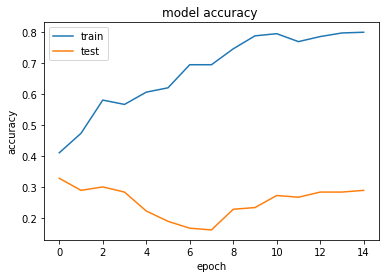

In [23]:

plt.plot(result_base.history['accuracy'])
plt.plot(result_base.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

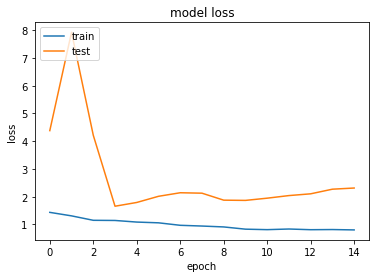

In [24]:

plt.plot(result_base.history['loss'])
plt.plot(result_base.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
val_generator.reset()
y_pred=base_model.predict(val_generator,steps=val_generator.n/batch_size,verbose=1)

8/7 [================================] - 3s 336ms/step


In [0]:
class_label=list(train_generator.class_indices.keys())


In [0]:
if val_suffle==True:
  per = np.random.permutation(val_generator.n)
  val_generator.index_array = per
  y_true = val_generator.classes[per]
else: 
  y_true = val_generator.classes

0.56 Black spot
0.54 Melanose
0.41 canker
0.5 greening
0.57 healthy


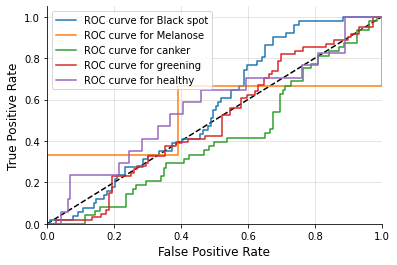

In [28]:
plot_multiclass_roc( y_pred, pd.get_dummies(y_true), n_classes=5,class_label=class_label, figsize=(8, 6))

In [0]:
y_pred=np.argmax(y_pred, axis=1)

In [30]:
y_pred.shape,y_true.shape

((180,), (180,))

In [31]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_true,y_pred))
print(f1_score(y_true,y_pred,average='macro'))

0.28888888888888886
0.09786204114562322


In [32]:
print(classification_report(y_true, y_pred,target_names=class_label))#

              precision    recall  f1-score   support

  Black spot       0.30      1.00      0.46        51
    Melanose       0.00      0.00      0.00         3
      canker       0.00      0.00      0.00        48
    greening       0.17      0.02      0.03        61
     healthy       0.00      0.00      0.00        17

    accuracy                           0.29       180
   macro avg       0.09      0.20      0.10       180
weighted avg       0.14      0.29      0.14       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model trained on villaged dataset

In [0]:
from tensorflow.keras.applications.densenet import DenseNet121
own_scratch_model =DenseNet121(weights = None, include_top=False, input_shape = (img_shape,img_shape,3))
x = own_scratch_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)
own_scratch_model = Model(inputs=own_scratch_model.input, outputs=predictions)
own_scratch_model.load_weights('/content/scratch_weights.hdf5')

In [0]:
transfer_scratch_model = Model(own_scratch_model.input, own_scratch_model.layers[-7].output)

In [35]:
transfer_scratch_model.layers[7].get_weights()[0][0:10]

array([0.9202305 , 0.93353206, 1.0833695 , 0.99886405, 0.9464825 ,
       0.8838621 , 1.0045762 , 1.0752947 , 1.0655146 , 0.83632797],
      dtype=float32)

In [0]:
x = transfer_scratch_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)

transfer_predictions = Dense(5, activation="softmax")(x)
transfer_scratch_model = Model(inputs=transfer_scratch_model.input, outputs=transfer_predictions)

In [37]:
transfer_scratch_model.layers[7].get_weights()[0][0:10]

array([0.9202305 , 0.93353206, 1.0833695 , 0.99886405, 0.9464825 ,
       0.8838621 , 1.0045762 , 1.0752947 , 1.0655146 , 0.83632797],
      dtype=float32)

In [0]:
def custom_loss(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)
transfer_scratch_model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])


In [0]:
%%time
transfer_scratch_results = transfer_scratch_model.fit(train_generator,epochs=15,verbose=0,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                              callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2, min_lr=0.000001)]
                    )

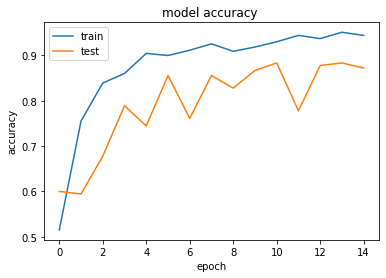

In [40]:

plt.plot(transfer_scratch_results.history['accuracy'])
plt.plot(transfer_scratch_results.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

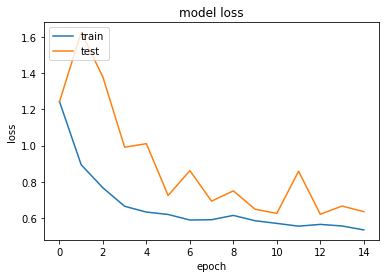

In [41]:

plt.plot(transfer_scratch_results.history['loss'])
plt.plot(transfer_scratch_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
val_generator.reset()
y_pred=transfer_scratch_model.predict(val_generator,steps=val_generator.n/batch_size,verbose=1)

8/7 [================================] - 3s 339ms/step


In [0]:
class_label=list(train_generator.class_indices.keys())

In [0]:
if val_suffle==True:
  per = np.random.permutation(val_generator.n)
  val_generator.index_array = per
  y_true = val_generator.classes[per]
else: 
  y_true = val_generator.classes

0.94 Black spot
1.0 Melanose
0.99 canker
0.96 greening
1.0 healthy


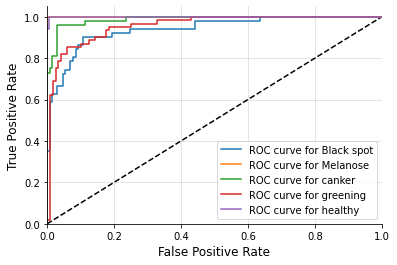

In [46]:
plot_multiclass_roc( y_pred, pd.get_dummies(y_true), n_classes=5,class_label=class_label, figsize=(5, 5))

In [0]:
y_pred=np.argmax(y_pred, axis=1)

In [48]:
y_pred.shape,y_true.shape

((180,), (180,))

In [49]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_true,y_pred))
print(f1_score(y_true,y_pred,average='macro'))

0.8611111111111112
0.9027162268268988


In [50]:
print(classification_report(y_true, y_pred,target_names=class_label))#

              precision    recall  f1-score   support

  Black spot       0.77      0.86      0.81        51
    Melanose       1.00      1.00      1.00         3
      canker       0.91      0.83      0.87        48
    greening       0.87      0.85      0.86        61
     healthy       1.00      0.94      0.97        17

    accuracy                           0.86       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.87      0.86      0.86       180



### Model trained on villaged dataset trained on imagenet

In [0]:
from tensorflow.keras.applications.densenet import DenseNet121
transfer_imgnet_model =DenseNet121(weights = None, include_top=False, input_shape = (img_shape,img_shape,3))
x = transfer_imgnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)
transfer_imgnet_model = Model(inputs=transfer_imgnet_model.input, outputs=predictions)
transfer_imgnet_model.load_weights('/content/densenet121_weights.hdf5')

In [0]:
transfer_imgnet_model = Model(transfer_imgnet_model.input, transfer_imgnet_model.layers[-7].output)


In [53]:
transfer_imgnet_model.layers[7].get_weights()[0][0:10]

array([3.32417786e-01, 7.54606426e-02, 1.05246633e-01, 2.35008463e-01,
       2.48995930e-01, 4.55867082e-01, 2.59272406e-06, 1.28041402e-01,
       1.12553934e-07, 2.02194408e-01], dtype=float32)

In [0]:
x = transfer_imgnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)

transfer_predictions = Dense(5, activation="softmax")(x)
transfer_imgnet_model = Model(inputs=transfer_imgnet_model.input, outputs=transfer_predictions)

In [55]:
transfer_imgnet_model.layers[7].get_weights()[0][0:10]

array([3.32417786e-01, 7.54606426e-02, 1.05246633e-01, 2.35008463e-01,
       2.48995930e-01, 4.55867082e-01, 2.59272406e-06, 1.28041402e-01,
       1.12553934e-07, 2.02194408e-01], dtype=float32)

In [0]:
def custom_loss(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)
transfer_imgnet_model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])


In [57]:
%%time
transfer_imgnet_results = transfer_imgnet_model.fit(train_generator,epochs=15,verbose=0,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                              callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2, min_lr=0.000001)]
                    )

CPU times: user 3min 42s, sys: 3 s, total: 3min 45s
Wall time: 3min 11s


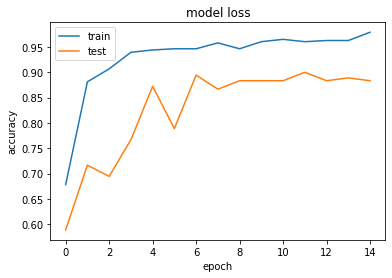

In [59]:

plt.plot(transfer_imgnet_results.history['accuracy'])
plt.plot(transfer_imgnet_results.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

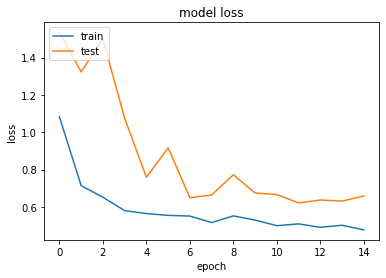

In [58]:

plt.plot(transfer_imgnet_results.history['loss'])
plt.plot(transfer_imgnet_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
val_generator.reset()
y_pred=transfer_imgnet_model.predict(val_generator,steps=val_generator.n/batch_size,verbose=1)

8/7 [================================] - 3s 341ms/step


In [0]:
class_label=list(train_generator.class_indices.keys())

In [0]:
if val_suffle==True:
  per = np.random.permutation(val_generator.n)
  val_generator.index_array = per
  y_true = val_generator.classes[per]
else: 
  y_true = val_generator.classes

0.95 Black spot
1.0 Melanose
0.99 canker
0.97 greening
1.0 healthy


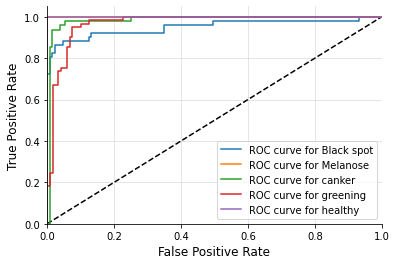

In [63]:
plot_multiclass_roc( y_pred, pd.get_dummies(y_true), n_classes=5,class_label=class_label, figsize=(5, 5))

In [0]:
y_pred=np.argmax(y_pred, axis=1)

In [65]:
y_pred.shape,y_true.shape

((180,), (180,))

In [66]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_true,y_pred))
print(f1_score(y_true,y_pred,average='macro'))

0.8888888888888888
0.9220934731697383


In [67]:
print(classification_report(y_true, y_pred,target_names=class_label))#

              precision    recall  f1-score   support

  Black spot       0.83      0.88      0.86        51
    Melanose       1.00      1.00      1.00         3
      canker       0.95      0.88      0.91        48
    greening       0.87      0.87      0.87        61
     healthy       0.94      1.00      0.97        17

    accuracy                           0.89       180
   macro avg       0.92      0.93      0.92       180
weighted avg       0.89      0.89      0.89       180



### Imagenet weights

In [68]:
from tensorflow.keras.applications.densenet import DenseNet121
image_model =DenseNet121(weights = 'imagenet', include_top=False, input_shape = (img_shape,img_shape,3))


29089792/29084464 [==============================] - 1s 0us/step


In [0]:
x = image_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(5, activation="softmax")(x)

In [0]:
image_model = Model(inputs=image_model.input, outputs=predictions)

In [71]:
image_model.layers[7].get_weights()[0][0:10]

array([2.81978130e-01, 1.29865497e-01, 2.31768519e-01, 1.80121988e-01,
       2.50349194e-01, 3.19371969e-01, 2.59272406e-06, 1.99219480e-01,
       1.12553934e-07, 2.05804318e-01], dtype=float32)

In [0]:
def custom_loss(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)

In [0]:
image_model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

In [74]:
%%time
image_results = image_model.fit(train_generator,epochs=15,verbose=0,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                              callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2, min_lr=0.000001)]
                    )

CPU times: user 3min 38s, sys: 3.27 s, total: 3min 41s
Wall time: 3min 8s


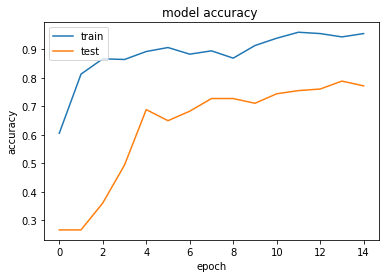

In [75]:

plt.plot(image_results.history['accuracy'])
plt.plot(image_results.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

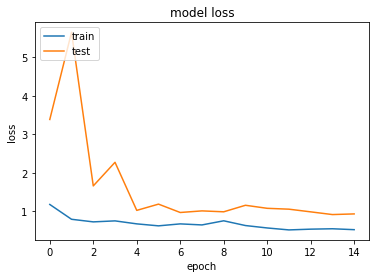

In [76]:

plt.plot(image_results.history['loss'])
plt.plot(image_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
val_generator.reset()
y_pred=image_model.predict(val_generator,steps=val_generator.n/batch_size,verbose=1)

8/7 [================================] - 3s 335ms/step


In [0]:
if val_suffle==True:
  per = np.random.permutation(val_generator.n)
  val_generator.index_array = per
  y_true = val_generator.classes[per]
else: 
  y_true = val_generator.classes

0.96 Black spot
1.0 Melanose
0.9 canker
0.89 greening
1.0 healthy


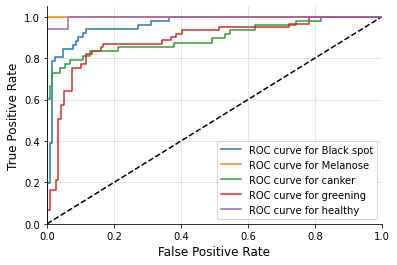

In [79]:
plot_multiclass_roc( y_pred, pd.get_dummies(y_true), n_classes=5,class_label=class_label, figsize=(10, 5))

In [0]:
y_pred=np.argmax(y_pred, axis=1)

In [81]:
y_pred.shape,y_true.shape

((180,), (180,))

In [82]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_true,y_pred))
print(f1_score(y_true,y_pred,average='macro'))

0.7888888888888889
0.7820421238189539


In [83]:
class_label=list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred,target_names=class_label))#

              precision    recall  f1-score   support

  Black spot       0.95      0.75      0.84        51
    Melanose       1.00      0.67      0.80         3
      canker       0.97      0.67      0.79        48
    greening       0.73      0.87      0.79        61
     healthy       0.53      1.00      0.69        17

    accuracy                           0.79       180
   macro avg       0.84      0.79      0.78       180
weighted avg       0.84      0.79      0.79       180



# Result

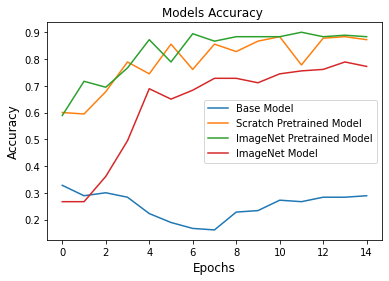

In [84]:

plt.plot(result_base.history['val_accuracy'])
plt.plot(transfer_scratch_results.history['val_accuracy'])
plt.plot(transfer_imgnet_results.history['val_accuracy'])
plt.plot(image_results.history['val_accuracy'])
plt.title('Models Accuracy ',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.legend(['Base Model', 'Scratch Pretrained Model','ImageNet Pretrained Model','ImageNet Model'], loc='best')
plt.show()

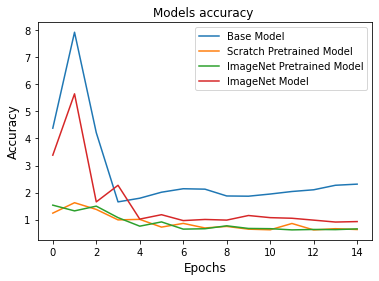

In [85]:

plt.plot(result_base.history['val_loss'])
plt.plot(transfer_scratch_results.history['val_loss'])
plt.plot(transfer_imgnet_results.history['val_loss'])
plt.plot(image_results.history['val_loss'])
plt.title('Models accuracy ',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.legend(['Base Model', 'Scratch Pretrained Model','ImageNet Pretrained Model','ImageNet Model'], loc='best')
plt.show()